## Basic functions

In [1]:
import tensorflow as tf  # tf 2.x
import tensornetwork as tn
tn.set_default_backend("tensorflow")
from tensornetwork import ncon
import matplotlib.pyplot as plt
import math
import cmath
import numpy as np

try:
    import QGOpt as qgo
except ImportError:
    !pip install git+https://github.com/LuchnikovI/QGOpt
    import QGOpt as qgo

In [3]:
from QCCalc import QCEvaluator
import general_utils as util
import channel_utils as c_util

In [4]:
Hadamard = tf.constant([[1, 1],
                        [1, -1]], dtype=tf.complex64) / math.sqrt(2)

S = util.matr_Rz(math.pi/2)

T = util.matr_Rz(math.pi/4)

E = tf.eye(2, dtype=tf.complex64)

CZ_44 = tf.constant([[1, 0, 0, 0],
                    [0, 1, 0, 0],
                    [0, 0, 1, 0],
                    [0, 0, 0, -1]], dtype=tf.complex64)

E_44 = tf.eye(4, dtype=tf.complex64)

CNOT_44 = tf.constant([[1, 0, 0, 0],
                    [0, 1, 0, 0],
                    [0, 0, 0, 1],
                    [0, 0, 1, 0]], dtype=tf.complex64) 
RNOT_44 = tf.constant([[1, 0, 0, 0],
                    [0, 0, 0, 1],
                    [0, 0, 1, 0],
                    [0, 1, 0, 0]], dtype=tf.complex64)

In [5]:
CNOT = util.convert_44_to_2222(CNOT_44)
CZ = util.convert_44_to_2222(CZ_44)
RNOT = util.convert_44_to_2222(RNOT_44)
big_E = util.convert_44_to_2222(E_44)

H_channel = c_util.convert_1qmatrix_to_channel(Hadamard)
S_channel = c_util.convert_1qmatrix_to_channel(S)
T_channel = c_util.convert_1qmatrix_to_channel(T)
CZ_channel = c_util.convert_2qmatrix_to_channel(CZ)
CNOT_channel = c_util.convert_2qmatrix_to_channel(CNOT)
big_E_channel = c_util.convert_2qmatrix_to_channel(big_E)
RNOT_channel = c_util.convert_2qmatrix_to_channel(RNOT)

In [21]:
qc_5_c = QCEvaluator([H_channel, CNOT_channel], 5)

tn_template_GHZ_5 = [[0] + 4 * [1],
               [[6, 1]] + [[7, -1, 2, 6]] + [[8, -2, 3, 7]] + [[9, -3, 4, 8]] + [[-5, -4, 5, 9]],
              [i for i in range (6, 10)],
              [-i for i in range (1, 6)]]

#qc_5.add_circuit(tn_template_GHZ_5, 'GHZ')
qc_5_c.add_circuit(tn_template_GHZ_5, 'GHZ')
full_samples_GHZ_5 = qc_5_c.make_full_samples('GHZ', 10000)

In [22]:
indic = tf.unravel_index(indices=tf.range(0, 32, delta=1, dtype=None), dims=(2, 2, 2, 2, 2))
true_psi = qc_5_c.evaluate(tf.transpose(indic), 'GHZ')
#true_p = tf.abs(true_psi) ** 2

In [23]:
dimdim = tf.constant([2,2,2,2,2], dtype=tf.int32)
counts = util.tf_ravel_multi_index(full_samples_GHZ_5, dimdim)
hist1 = tf.math.bincount(counts)
#trash1, trash2, hist = tf.unique_with_counts(counts, out_idx=tf.int64)

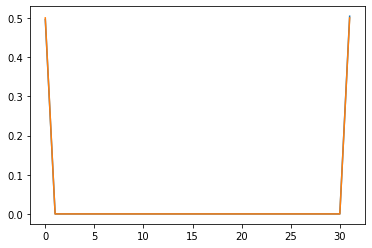

In [24]:
#plt.plot(hist / counts.shape[0])
plt.plot(hist1 / counts.shape[0])
plt.plot(tf.abs(true_psi))

In [9]:
qc_5_c_alt = QCEvaluator([H_channel, S_channel, T_channel, CZ_channel, tf.eye(4, dtype=tf.complex64)], 5)

GHZ_5_legs = [[i+5, i] for i in range (1, 6)] + [[14+i, 10+i] for i in range (1, 4)] + [[-5, 14]] +\
[[11, -1, 7, 6]] + [[10+i, -i, i+6, i+13] for i in range (2, 5)]

tn_template_GHZ_5_alt = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3],
GHZ_5_legs,
[i for i in range (6, 18)],
[-i for i in range (1, 6)]]  #-i for i in range (1, 51)]

#qc_5.add_circuit(tn_template_GHZ_5, 'GHZ')
qc_5_c_alt.add_circuit(tn_template_GHZ_5_alt, 'GHZ')
full_samples_GHZ_5_alt = qc_5_c_alt.make_full_samples('GHZ', 10000)

In [10]:
GHZ_5_legs 

[[6, 1],
 [7, 2],
 [8, 3],
 [9, 4],
 [10, 5],
 [15, 11],
 [16, 12],
 [17, 13],
 ['out5', 14],
 [11, 'out1', 7, 6],
 [12, 'out2', 8, 15],
 [13, 'out3', 9, 16],
 [14, 'out4', 10, 17]]

In [11]:
indic = tf.unravel_index(indices=tf.range(0, 32, delta=1, dtype=None), dims=(2, 2, 2, 2, 2))
true_psi = qc_5_c_alt.evaluate(tf.transpose(indic), 'GHZ')
#true_p = tf.abs(true_psi) ** 2

In [12]:
counts = util.tf_ravel_multi_index(full_samples_GHZ_5_alt, dimdim)
hist1 = tf.math.bincount(counts)
#trash1, trash2, hist = tf.unique_with_counts(counts, out_idx=tf.int64)

C:\Users\1337pocan\anaconda3\envs\tf\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


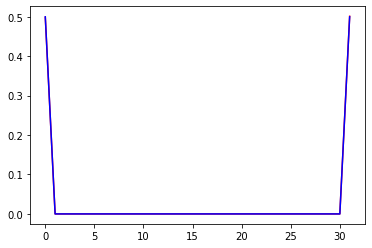

In [13]:
#plt.plot(hist / counts.shape[0])
plt.plot(hist1 / counts.shape[0], color = 'red')
plt.plot(true_psi, color = 'blue')

In [14]:
tn_template_GHZ_5_2 = [[0, 0, 0, 3, 4, 4, 4],
[[6, 1], [7, 2], [-2, 8], [8, -1, 7, 6], [-3, 3], [-4, 4], [-5, 5]],
[i for i in range (6, 9)],
[-i for i in range (1, 6)]]  #-i for i in range (1, 51)]

qc_5_c_alt.add_circuit(tn_template_GHZ_5_2, 'GHZ_2')
full_samples_GHZ_5_2 = qc_5_c_alt.make_full_samples('GHZ_2', 10000)

In [15]:
full_samples_GHZ_5_2[:10]

<tf.Tensor: shape=(10, 5), dtype=int32, numpy=
array([[1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0]])>

In [16]:
debil_template = [[0, 0, 1],
                 [[3, 2], [-2, 4], [4, -1, 3, 1]],
                 [3, 4],
                 [-1, -2]]

In [17]:
qc_debil = QCEvaluator([H_channel, CZ_channel], 2)
qc_debil.add_circuit(debil_template, 'debil')

qc_debil.in_states = 2 * [tf.constant([0, 0, 0, 1], dtype=tf.complex64)]
samples_debil_11 = qc_debil.make_full_samples('debil')
qc_debil.in_states = 2 * [tf.constant([1, 0, 0, 0], dtype=tf.complex64)]
samples_debil_00 = qc_debil.make_full_samples('debil')
qc_debil.in_states = [tf.constant([1, 0, 0, 0], dtype=tf.complex64)] + [tf.constant([0, 0, 0, 1], dtype=tf.complex64)]
samples_debil_01 = qc_debil.make_full_samples('debil')
qc_debil.in_states = [tf.constant([0, 0, 0, 1], dtype=tf.complex64)] + [tf.constant([1, 0, 0, 0], dtype=tf.complex64)]
samples_debil_10 = qc_debil.make_full_samples('debil')

In [18]:
samples_debil_00[:5] #00

<tf.Tensor: shape=(5, 2), dtype=int32, numpy=
array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])>

In [19]:
samples_debil_01[:5] #01

<tf.Tensor: shape=(5, 2), dtype=int32, numpy=
array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])>

In [20]:
samples_debil_10[:5] #11

<tf.Tensor: shape=(5, 2), dtype=int32, numpy=
array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]])>

In [21]:
samples_debil_11[:5] #10

<tf.Tensor: shape=(5, 2), dtype=int32, numpy=
array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])>

In [22]:
debil_template_cnot = [[0],
                 [[-2, -1, 2, 1]],
                 [],
                 [-1, -2]]

In [23]:
qc_debil_cnot = QCEvaluator([CNOT_channel], 2)
qc_debil_cnot.add_circuit(debil_template_cnot, 'debil')

qc_debil_cnot.in_states = 2 * [tf.constant([0, 0, 0, 1], dtype=tf.complex64)]
samples_debil2_11 = qc_debil_cnot.make_full_samples('debil')
qc_debil_cnot.in_states = 2 * [tf.constant([1, 0, 0, 0], dtype=tf.complex64)]
samples_debil2_00 = qc_debil_cnot.make_full_samples('debil')
qc_debil_cnot.in_states = [tf.constant([1, 0, 0, 0], dtype=tf.complex64)] + [tf.constant([0, 0, 0, 1], dtype=tf.complex64)]
samples_debil2_01 = qc_debil_cnot.make_full_samples('debil')
qc_debil_cnot.in_states = [tf.constant([0, 0, 0, 1], dtype=tf.complex64)] + [tf.constant([1, 0, 0, 0], dtype=tf.complex64)]
samples_debil2_10 = qc_debil_cnot.make_full_samples('debil')

In [24]:
samples_debil2_00[:5] #00

<tf.Tensor: shape=(5, 2), dtype=int32, numpy=
array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])>

In [25]:
samples_debil2_01[:5] #01

<tf.Tensor: shape=(5, 2), dtype=int32, numpy=
array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])>

In [26]:
samples_debil2_10[:5] #11

<tf.Tensor: shape=(5, 2), dtype=int32, numpy=
array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]])>

In [27]:
samples_debil2_11[:5] #10

<tf.Tensor: shape=(5, 2), dtype=int32, numpy=
array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])>

In [28]:
qc_eye = QCEvaluator([big_E_channel], 2)
qc_eye.add_circuit(debil_template_cnot, 'idd')
qc_eye.in_states = 2 * [tf.constant([0, 0, 0, 1], dtype=tf.complex64)]
samples_id_11 = qc_eye.make_full_samples('idd')
qc_eye.in_states = 2 * [tf.constant([1, 0, 0, 0], dtype=tf.complex64)]
samples_id_00 = qc_eye.make_full_samples('idd')
qc_eye.in_states = [tf.constant([1, 0, 0, 0], dtype=tf.complex64)] + [tf.constant([0, 0, 0, 1], dtype=tf.complex64)]
samples_id_01 = qc_eye.make_full_samples('idd')
qc_eye.in_states = [tf.constant([0, 0, 0, 1], dtype=tf.complex64)] + [tf.constant([1, 0, 0, 0], dtype=tf.complex64)]
samples_id_10 = qc_eye.make_full_samples('idd')

In [29]:
samples_id_10[:5]

<tf.Tensor: shape=(5, 2), dtype=int32, numpy=
array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])>

## Stuff for testing
### Unitary matrices generation

In [30]:
u_set = tf.random.normal((3, 4, 4, 2), dtype=tf.float32)
u_set = tf.complex(u_set[...,0], u_set[...,1])
u_set, _ = tf.linalg.qr(u_set)
#print(u_set[0])
u_set = tf.reshape(u_set, (3, 2, 2, 2, 2))
#print(u_set[0])
u_set_channels = tf.concat([c_util.convert_2qmatrix_to_channel(u_set[i])[tf.newaxis] for i in range(3)], axis=0)

### Calculating using simple_qc

In [31]:
circ = [[u_set[1], [2, 1]], [u_set[0], [1, 0]], [u_set[2], [3, 2]]]
#circ = [[u_set[1], [1, 2]], [u_set[0], [0, 1]], [u_set[2], [2, 3]]]
help_me = tf.abs(tf.reshape(util.simple_qc(circ, 4), (-1,))) ** 2

### Making tensor network template

In [32]:
qc_4_c = QCEvaluator(u_set_channels, 4)

tn_template_test = [[0] + [1] + [2],
[[-2, -1, 5, 1]] + [[6, 5, 3, 2]] + [[-4, -3, 4, 6]], 
[5, 6],
[-i for i in range (1, 5)]]  #-i for i in range (1, 51)]

qc_4_c.add_circuit(tn_template_test, 'test_random')
full_samples_test = qc_4_c.make_full_samples('test_random', 1000000)

In [33]:
#samples_test = qc_4.make_full_samples('test_random', 10)

In [34]:
#samples_test

### Checking 1) psi^2 (RED) 2) sampling distribution (GREEN) 3) simple psi^2 (BLUE)

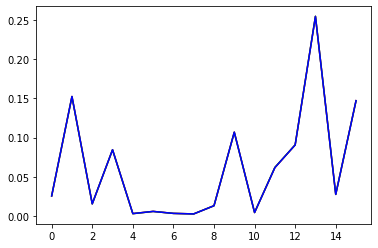

In [35]:
dim4 = tf.constant([2,2,2,2], dtype=tf.int32)

indic = tf.unravel_index(indices=tf.range(0, 2 ** 4, delta=1, dtype=None), dims=dim4)
true_psi_test = qc_4_c.evaluate(tf.transpose(indic), 'test_random')
true_p_test = tf.abs(true_psi_test)

counts_test = util.tf_ravel_multi_index(full_samples_test, dim4)
counts_test_np = counts_test.numpy()
hist_test = tf.math.bincount(counts_test)
#trash1, trash2, hist = tf.unique_with_counts(counts_test, out_idx=tf.int64)

plt.plot(true_p_test/1, c = 'red') #tf.reduce_sum(true_p_test)
#plt.plot(np.histogram(counts_test, bins=16, range=(0, 15), density=True)[0])
plt.plot(hist_test / counts_test.shape[0], c = 'green')
plt.plot(help_me, c = 'blue')

In [36]:
tf.reduce_sum(true_p_test)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0000004>

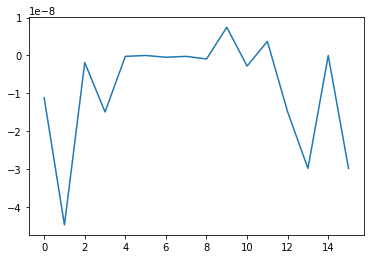

In [37]:
plt.plot(true_p_test - help_me)

In [38]:
sample_p = tf.cast(hist_test / counts_test.shape[0], dtype=tf.float32)

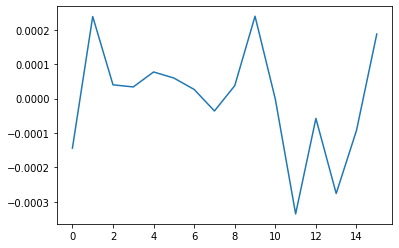

In [39]:
plt.plot(true_p_test - sample_p)

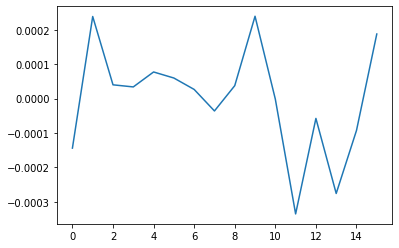

In [40]:
plt.plot(help_me - sample_p)